In [1]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

### 1. Loading images

In [2]:
background_LE = cv2.imread('HW1_Q4_background_LE.bmp', 0)
fullscale_LE = cv2.imread('HW1_Q4_fullscale_LE.bmp', 0)
object_LE = cv2.imread('HW1_Q4_object_LE.bmp', cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Object Image')

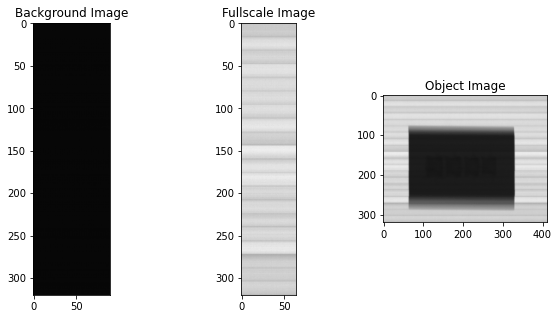

In [3]:
fig, ax = plt.subplots(1, 3, figsize = (10, 5))

ax[0].imshow(background_LE, cmap='gray', vmin = 0, vmax = 255)
ax[0].set_title('Background Image')

ax[1].imshow(fullscale_LE, cmap='gray', vmin = 0, vmax = 255)
ax[1].set_title('Fullscale Image')

ax[2].imshow(object_LE, cmap='gray', vmin = 0, vmax = 255)
ax[2].set_title('Object Image')

### 2. Calculate the average of columns and store them in two arrays

In [4]:
background_LE_avg = np.mean(background_LE, axis=1, keepdims = True)
fullscale_LE_avg = np.mean(fullscale_LE, axis=1, keepdims = True)

### 3. Normalize the object image using the average arrays

In [10]:
normalized_img = (object_LE - background_LE_avg) / (fullscale_LE_avg - background_LE_avg) * 255

### 4. Plot the original and normalized images

Text(0.5, 1.0, 'Normalized Object Image')

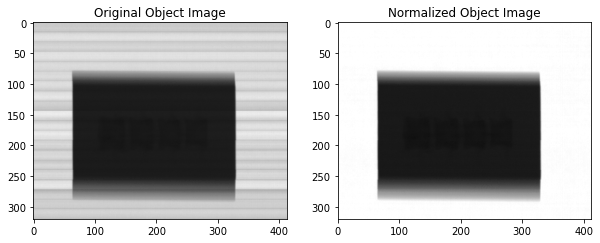

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].imshow(object_LE, cmap='gray', vmin = 0, vmax = 255)
ax[0].set_title('Original Object Image')

ax[1].imshow(normalized_img, cmap='gray', vmin = 0, vmax = 255)
ax[1].set_title('Normalized Object Image')

### 5. Enhance the image using the change in contrast method
### TODO: Explain the algorithm

In [98]:
image = normalized_img.astype(np.uint8)

In [92]:
#Creating CLAHE 
clahe = cv2.createCLAHE(clipLimit=8, tileGridSize=(2,2))

#Apply CLAHE to the original image
image_clahe = clahe.apply(image)

In [99]:
new_image = np.zeros(image.shape, image.dtype)

In [161]:
alpha = 3 # Contrast control
beta = 1.5    # Brightness control

for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        new_image[y,x] = np.clip(alpha*image[y,x] + beta, 0, 255)

Text(0.5, 1.0, 'Histogram Equalized Image with CLAHE')

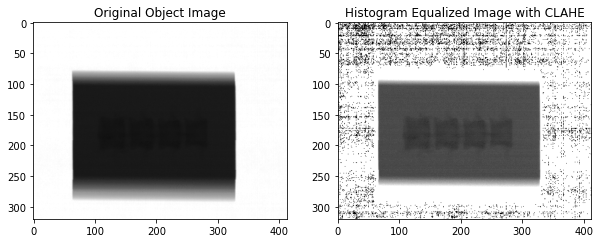

In [162]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].imshow(normalized_img, cmap='gray', vmin = 0, vmax = 255)
ax[0].set_title('Original Object Image')

ax[1].imshow(new_image, cmap='gray', vmin = 0, vmax = 255)
ax[1].set_title('Histogram Equalized Image with CLAHE')